C:\Users\sudha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 73)             │        26,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,298 (114.45 KB)

 Trainable params: 29,298 (114.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.0232 - mae: 0.0430 - mse: 0.0232 - val_loss: 5.9576e-04 - val_mae: 0.0239 - val_mse: 5.9576e-04
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 1.5312e-04 - mae: 0.0099 - mse: 1.5312e-04 - val_loss: 6.0313e-04 - val_mae: 0.0240 - val_mse: 6.0313e-04
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 1.4580e-04 - mae: 0.0097 - mse: 1.4580e-04 - val_loss: 5.0715e-04 - val_mae: 0.0220 - val_mse: 5.0715e-04
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 1.2227e-04 - mae: 0.0088 - mse: 1.2227e-04 - val_loss: 2.1162e-04 - val_mae: 0.0138 - val_mse: 2.1162e-04
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 7.9738e-05 - mae: 0.0071 - mse: 7.9738e-05 - val_loss: 1.6981e-04 - val_mae: 0.0123 - val_mse: 1.6981e-04
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 6.2766e-05 - mae: 0.0063 - mse: 6.2766e-05 - val_loss: 4.5980e-05 - val_mae: 0.0060 - val_mse: 4.5980e-05


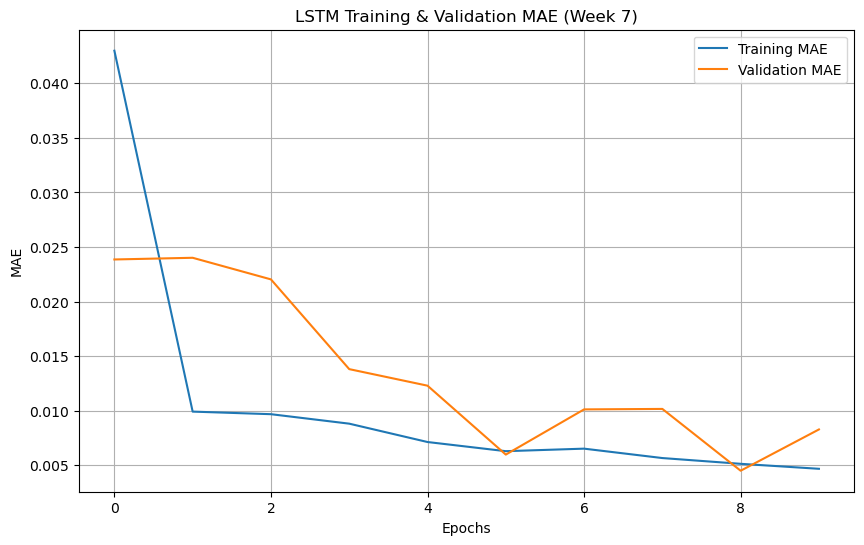

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

df = pd.read_csv(r"C:\Users\sudha\Downloads\GOLD_2022_normalised_NEW-1000.csv")

feature_cols = [
    'Open_Bid','High_Bid','Low_Bid','Close_Bid','Volume_Bid',
    'Open_Ask','High_Ask','Low_Ask','Close_Ask','Volume_Ask',
    'Volume_Delta','Volume_Delta_abs',
    'Open_Delta','High_Delta','Low_Delta','Close_Delta',
    'New_day','New_week'
]

target_cols = ['Y_High_Bid','Y_Low_Ask']

X_raw = df[feature_cols].values.astype("float32")
Y_raw = df[target_cols].values.astype("float32")

N = 50
n_small = 30000

X_data = X_raw[:n_small]
Y_data = Y_raw[:n_small]

L = n_small - N - 5
t = X_data.shape[1]

X = np.zeros((L, N, t), dtype="float32")
Y = np.zeros((L, 2), dtype="float32")

for i in range(L):
    X[i] = X_data[i:i+N]
    Y[i] = Y_data[i+N-1]

train_size = int(0.8 * L)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

sid = "2421463"
Z = int(sid[-2])
Y_digit = int(sid[-1])
lstm_units = int(f"{Z}{Y_digit}") + 10

model = Sequential()
model.add(LSTM(lstm_units, input_shape=(N, t)))
model.add(Dense(32, activation="relu"))
model.add(Dense(2))

model.compile(optimizer="adam", loss="mse", metrics=["mse","mae"])
model.summary()

es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
mc = ModelCheckpoint("best_lstm_gold.keras", monitor="val_loss", save_best_only=True)

history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[es, mc],
    verbose=1
)

test_loss, test_mse, test_mae = model.evaluate(X_test, Y_test, verbose=0)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)

plt.figure(figsize=(10,6))
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("LSTM Training & Validation MAE (Week 7)")
plt.legend()
plt.grid(True)
plt.show()
